In [1]:
%cd ..

d:\youtube-andrej-karpathy\neural-networks-zero-to-hero


In [2]:
from utilities.utils import draw_dot

In [3]:
class Value:
    def __init__(self, data, _children=(), _op = '', label = ''):
        self.data = data 
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out 

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')

e = a*b
e.label = 'e'

d = e + c
d.label = 'd'

f = Value(-2.0, label = 'f')
L = d * f # Graph output
L.label = 'L'

---

### Manually Calculating Gradients

#### dL/dL

In [4]:
def lol():

    h = 0.0001

    # Original
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')

    e = a*b
    e.label = 'e'

    d = e + c
    d.label = 'd'

    f = Value(-2.0, label = 'f')
    L = d * f # Graph output
    L.label = 'L'

    L1 = L.data # L is a Value object, we only need data

    # Derivative of L w.r.t L
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')

    e = a*b
    e.label = 'e'

    d = e + c
    d.label = 'd'

    f = Value(-2.0, label = 'f')
    L = d * f # Graph output
    L.label = 'L'

    L2 = L.data + h

    print((L2 - L1)/h)

lol()

0.9999999999976694


So derivative of L w.r.t L is 1, `dL/dL = 1`, we can manually set it.

In [5]:
L.grad = 1.0

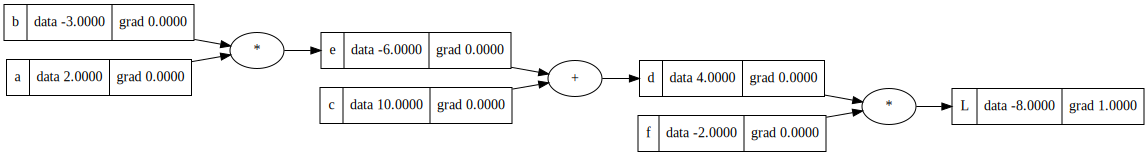

In [6]:
draw_dot(L)

---

#### dL/df and dL/dd

**Manually Calculating the Gradients**

```
L = d * f

dL/dd = f (By product rule)

OR

= [f(x+h) - f(h)] / h
= [((d + h)*f) - (d*f)] / h
= [d*f + h*f - d*f] / h 
= [h*f] / h
= f
```
  
So, by symmetry,
```
dL/df = d
```

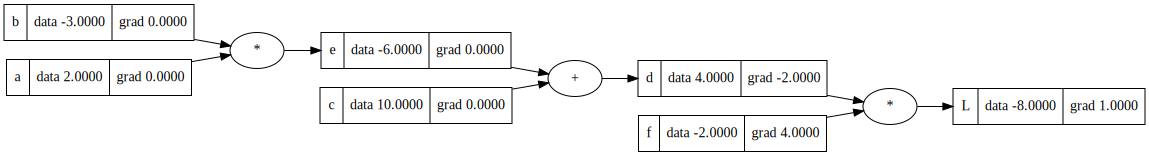

In [7]:
f.grad = 4 # Value of d
d.grad = -2.0 # Value of f

draw_dot(L)

In [8]:
# Checking above values

def lol():

    h = 0.0001

    # Original
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')

    e = a*b
    e.label = 'e'

    d = e + c
    d.label = 'd'

    f = Value(-2.0, label = 'f')
    L = d * f # Graph output
    L.label = 'L'

    L1 = L.data # L is a Value object, we only need data

    # Derivative of L w.r.t f
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')

    e = a*b
    e.label = 'e'

    d = e + c
    d.label = 'd'

    f = Value(-2.0 + h, label = 'f')
    L = d * f # Graph output
    L.label = 'L'

    L2 = L.data

    print((L2 - L1)/h)

lol()

3.9999999999995595


In [9]:
# Checking above values

def lol():

    h = 0.0001

    # Original
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')

    e = a*b
    e.label = 'e'

    d = e + c
    d.label = 'd'

    f = Value(-2.0, label = 'f')
    L = d * f # Graph output
    L.label = 'L'

    L1 = L.data # L is a Value object, we only need data

    # Derivative of L w.r.t d
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')

    e = a*b
    e.label = 'e'

    d = e + c
    d.label = 'd'
    d.data += h

    f = Value(-2.0 + h, label = 'f')
    L = d * f # Graph output
    L.label = 'L'

    L2 = L.data

    print((L2 - L1)/h)

lol()

2.000100000003613


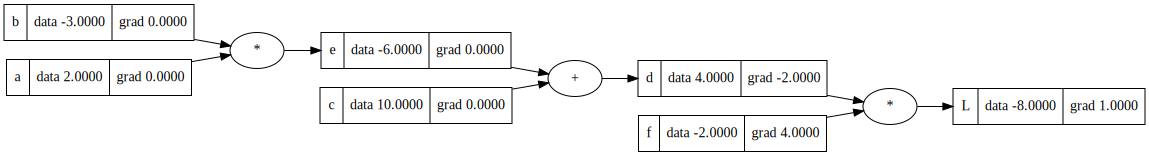

In [10]:
draw_dot(L)

---

#### dL/dc and dL/de

We know how `d` and `f` affect `L`. To find the effect of `c` on `L`, we need to find the effect of `c` on `d`

```
d = c + e

dd/dc = dc/dc + de/de = 1 + 0 = 1

dd/dc = [f(x + h) - f(x)]/h
      = [((c + h) + e) - (c + e)]/h
      = [c + h + e - c + e]/h
      = 1.0
```
  
So in case of addition, derivative is 1.  
Symmetrically,   
`dd/de = 1.0`

We can think of this as the local derivative because it is calculated w.r.t the current operation and not the whole graph till the end.

---